In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seed = 20230604
np.random.seed(seed=seed)

In [2]:
df = pd.read_csv('ks-projects-201801.csv', index_col='ID', parse_dates=['deadline', 'launched'])

# 1. EDA & Feature engineering

In [3]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 1.1 Encode target

In [4]:
df.state.value_counts()

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64

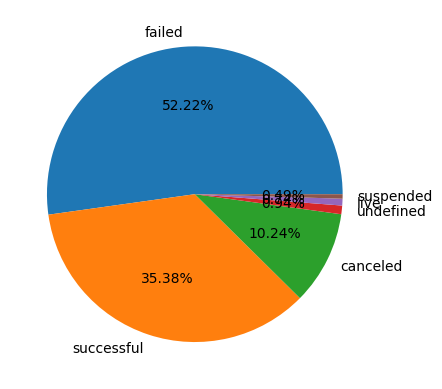

In [5]:
project_status = df.state.value_counts()
plt.pie(project_status, labels=project_status.index, autopct='%.2f%%')
plt.show()

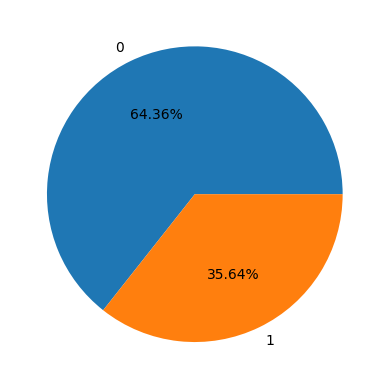

In [6]:
df = df[df['state'] != 'live']
df['target'] = (df['state'] == 'successful').astype('int')

project_status = df.target.value_counts()
plt.pie(project_status, labels=project_status.index, autopct='%.2f%%')
plt.show()

In [7]:
df = df.drop('state', axis=1)

## 1.2 Working with datetime columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375862 entries, 1000002330 to 999988282
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              375858 non-null  object        
 1   category          375862 non-null  object        
 2   main_category     375862 non-null  object        
 3   currency          375862 non-null  object        
 4   deadline          375862 non-null  datetime64[ns]
 5   goal              375862 non-null  float64       
 6   launched          375862 non-null  datetime64[ns]
 7   pledged           375862 non-null  float64       
 8   backers           375862 non-null  int64         
 9   country           375862 non-null  object        
 10  usd pledged       372066 non-null  float64       
 11  usd_pledged_real  375862 non-null  float64       
 12  usd_goal_real     375862 non-null  float64       
 13  target            375862 non-null  int64         
dt

In [9]:
df['year'] = df.deadline.dt.year
df['month'] = df.deadline.dt.month
df['day'] = df.deadline.dt.day
df['quarter'] = df.deadline.dt.quarter

df['year_launched'] = df.launched.dt.year
df['month_launched'] = df.launched.dt.month
df['day_launched'] = df.launched.dt.day
df['quarter_launched'] = df.launched.dt.quarter

df[['year', 'month', 'day', 'quarter']].head()

,year,month,day,quarter
ID,,,,
1000002330,2015,10,9,4
1000003930,2017,11,1,4
1000004038,2013,2,26,1
1000007540,2012,4,16,2
1000011046,2015,8,29,3


## 1.3 Processing Timedelta columns

In [10]:
df['timedelta'] = (df['deadline'] - df['launched'])
df[['launched', 'deadline', 'timedelta']]

,launched,deadline,timedelta
ID,,,
1000002330,2015-08-11 12:12:28,2015-10-09,58 days 11:47:32
1000003930,2017-09-02 04:43:57,2017-11-01,59 days 19:16:03
1000004038,2013-01-12 00:20:50,2013-02-26,44 days 23:39:10
1000007540,2012-03-17 03:24:11,2012-04-16,29 days 20:35:49
1000011046,2015-07-04 08:35:03,2015-08-29,55 days 15:24:57
...,...,...,...
999976400,2014-09-17 02:35:30,2014-10-17,29 days 21:24:30
999977640,2011-06-22 03:35:14,2011-07-19,26 days 20:24:46
999986353,2010-07-01 19:40:30,2010-08-16,45 days 04:19:30


In [11]:
df['days_project_duration'] = df['timedelta'].dt.days
df['hours_project_duration'] = df['timedelta'].dt.seconds // (60 * 60)
df['second_project_duration'] = df['timedelta'].dt.seconds
df['usd_per_day'] = df['usd_goal_real'] / df['days_project_duration']
timedelta_cols = ['days_project_duration', 'hours_project_duration', 'second_project_duration', 'usd_per_day']
df[timedelta_cols].head()

,days_project_duration,hours_project_duration,second_project_duration,usd_per_day
ID,,,,
1000002330,58,11,42452,26.447414
1000003930,59,19,69363,508.474576
1000004038,44,23,85150,1022.727273
1000007540,29,20,74149,172.413793
1000011046,55,15,55497,354.545455


## 1.4 Add columns based on category aggregation

In [12]:
import country_converter as coo
import plotly_express as px

In [13]:
success_rate_by_country = (df.groupby('country').agg({'target': np.mean}) * 100)\
    .sort_values(by='target', ascending=False)\
    .reset_index()\
    .rename({'target': 'success_rate'}, axis=1)
    
success_rate_by_country.index = coo.convert(success_rate_by_country.country, to='ISO3')
px.choropleth(success_rate_by_country, locations=success_rate_by_country.index, color=success_rate_by_country.success_rate)

N,0" not found in regex


In [14]:
success_rate_by_country.head()
df = pd.merge(left=df, right=success_rate_by_country, on='country')

### Remove nonexisting country

In [15]:
df = df[df.country != "N,0"]

# 2. Data transformation

## 2.1 Remove NaNs and Inf

In [16]:
df = df[df['usd_per_day'] != np.inf].dropna()

## 2.2 Encode categorical columns

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [18]:
obj_columns = df.select_dtypes('O')
obj_columns_names = obj_columns.columns

In [19]:
df[obj_columns_names].head()

,name,category,main_category,currency,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,GB
1,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,GB
2,Superhero Teddy Bear,DIY,Crafts,GBP,GB
3,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,GB
4,Daily Brew Coffee,Food Trucks,Food,GBP,GB


In [20]:
df[obj_columns_names].nunique()

name             369200
category            159
main_category        15
currency             14
country              22
dtype: int64

In [21]:
df = df.drop('name', axis=1)

In [23]:
ohe = OneHotEncoder(sparse_output=False, drop="first")
label_encoder = LabelEncoder()
label_part = pd.DataFrame(label_encoder.fit_transform(df['category']), columns=['category'])

ohe_matrix = ohe.fit_transform(df[['main_category', 'currency', 'country']])
ohe_part = pd.DataFrame(ohe_matrix, columns=ohe.get_feature_names_out()).astype(int)

In [24]:
ohe_part.head()

,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.3 Scale numerical columns

In [25]:
float_columns = df.select_dtypes('float')
float_columns_names = float_columns.columns
float_columns.head()

,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real,usd_per_day,success_rate
0,1000.0,0.00,0.00,0.00,1533.95,26.447414,36.136316
1,5000.0,94175.00,57763.78,121857.33,6469.73,239.619630,36.136316
2,12000.0,0.00,0.00,0.00,17489.65,603.091379,36.136316
3,100.0,112.38,167.70,160.60,142.91,4.927931,36.136316
4,3500.0,21.00,32.42,31.09,5181.12,178.659310,36.136316


In [26]:
int_columns = df.select_dtypes('int')
int_columns_names = int_columns.columns
int_columns.head()

,backers,target,year,month,day,quarter,year_launched,month_launched,day_launched,quarter_launched,days_project_duration,hours_project_duration,second_project_duration
0,0,0,2015,10,9,4,2015,8,11,3,58,11,42452
1,761,1,2017,5,3,2,2017,4,5,2,27,4,15342
2,0,0,2016,1,5,1,2015,12,6,4,29,3,13854
3,27,1,2016,1,28,1,2015,12,29,4,29,7,25231
4,1,0,2015,3,31,1,2015,3,1,1,29,5,21208


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(float_columns)
float_part = pd.DataFrame(scaled_matrix, columns=float_columns_names)
float_part.head()

,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real,usd_per_day,success_rate
0,-0.041012,-0.101352,-0.089712,-0.099828,-0.038524,-0.025790,0.039438
1,-0.037596,0.876799,0.642012,1.230002,-0.034194,-0.021862,0.039438
2,-0.031620,-0.101352,-0.089712,-0.099828,-0.024528,-0.015165,0.039438
3,-0.041780,-0.100184,-0.087587,-0.098075,-0.039744,-0.026187,0.039438
4,-0.038877,-0.101133,-0.089301,-0.099489,-0.035325,-0.022985,0.039438


## 2.4 merge all together

In [28]:
transformed_dfs = [label_part, ohe_part, int_columns, float_part]
df_final = pd.concat(transformed_dfs, axis=1).dropna()
df_final.head()

,category,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,...,days_project_duration,hours_project_duration,second_project_duration,goal,pledged,usd pledged,usd_pledged_real,usd_goal_real,usd_per_day,success_rate
0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,11.0,42452.0,-0.041012,-0.101352,-0.089712,-0.099828,-0.038524,-0.025790,0.039438
1,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,27.0,4.0,15342.0,-0.037596,0.876799,0.642012,1.230002,-0.034194,-0.021862,0.039438
2,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,3.0,13854.0,-0.031620,-0.101352,-0.089712,-0.099828,-0.024528,-0.015165,0.039438
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,7.0,25231.0,-0.041780,-0.100184,-0.087587,-0.098075,-0.039744,-0.026187,0.039438
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,29.0,5.0,21208.0,-0.038877,-0.101133,-0.089301,-0.099489,-0.035325,-0.022985,0.039438


# 3. Building ML model

## 3.1 Train test split

In [29]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_final, test_size=0.25)
print(df_train.shape, df_test.shape)

(276045, 69) (92016, 69)


In [30]:
X_train = df_train.drop('target', axis=1)
y_train = df_train['target'].astype(int)
X_test = df_test.drop('target', axis=1)
y_test = df_test['target'].astype(int)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(276045, 68) (276045,) (92016, 68) (92016,)


## 3.2 Baseline model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f'Accuracy: {log_reg.score(X_test, y_test):.3f}')

Accuracy: 0.788


In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

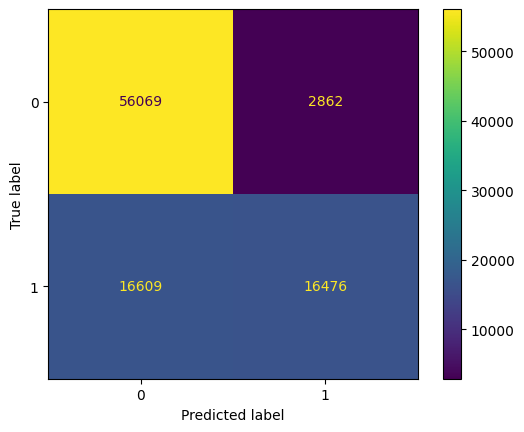

In [47]:
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

## 3.3 Basic classification metrics

$$Confusion Matix = \begin{bmatrix} TN & FP\\FN & TP\end{bmatrix} = \begin{bmatrix} 56 069 & 2862\\16 069 & 16 476\end{bmatrix}$$

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{16476 + 56069}{16476 + 56069 + 2862 + 16609} = 0.788$$
$$ Precision = \frac{TP}{TP + FP} = \frac{16476}{16476 + 2862} = 0.852$$
$$ Recall = \frac{TP}{TP + FN} = \frac{16476}{16476 + 16 069} = 0.506$$

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     58931
           1       0.85      0.50      0.63     33085

    accuracy                           0.79     92016
   macro avg       0.81      0.72      0.74     92016
weighted avg       0.80      0.79      0.77     92016



## 3.4 Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.788
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     58931
           1       0.71      0.70      0.70     33085

    accuracy                           0.79     92016
   macro avg       0.77      0.77      0.77     92016
weighted avg       0.79      0.79      0.79     92016



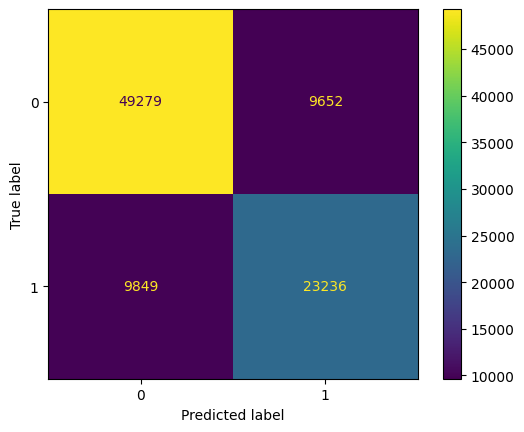

In [57]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Accuracy: {tree.score(X_test, y_test):.3f}')
confusion = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
print(classification_report(y_test, y_pred_tree))


Accuracy: 0.848
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     58931
           1       0.76      0.85      0.80     33085

    accuracy                           0.85     92016
   macro avg       0.83      0.85      0.84     92016
weighted avg       0.86      0.85      0.85     92016



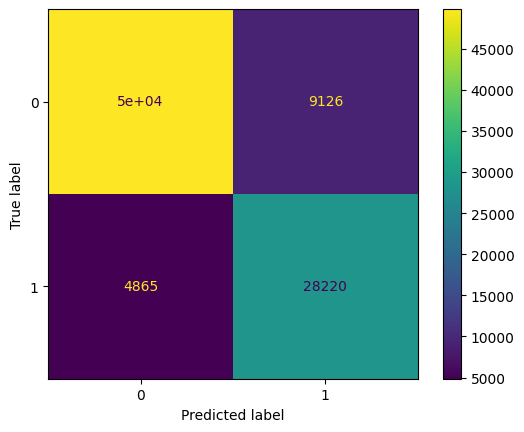

In [58]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Accuracy: {tree.score(X_test, y_test):.3f}')
confusion = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
print(classification_report(y_test, y_pred_tree))


## 3.5 Random Forest

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     58931
           1       0.77      0.82      0.80     33085

    accuracy                           0.85     92016
   macro avg       0.84      0.84      0.84     92016
weighted avg       0.85      0.85      0.85     92016



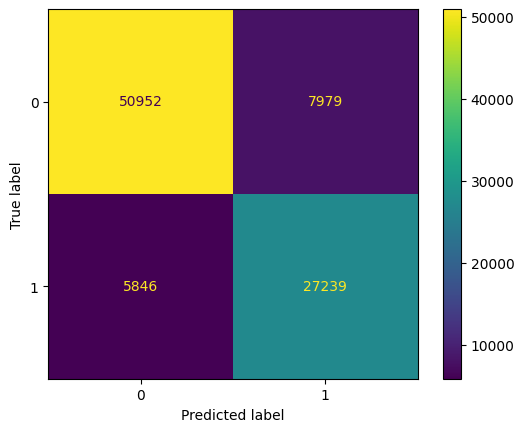

In [60]:
from sklearn.ensemble import RandomForestClassifier
random_tree = RandomForestClassifier(n_jobs=-1)

random_tree.fit(X_train, y_train)
y_pred_random_tree = random_tree.predict(X_test)
print(classification_report(y_test, y_pred_random_tree))
confusion = confusion_matrix(y_test, y_pred_random_tree)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()